In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")

# **Signals**

In [9]:
from msr.data.download.sleep_edf import load_sleep_edf_raw_tensors_for_split, FS
from msr.data.measurements import SleepEDFMeasurement

data, targets = load_sleep_edf_raw_tensors_for_split("val")
data, targets = data.numpy(), targets.numpy()
sample = data[111]
eeg_0, eeg_1, eog = sample
measurement = SleepEDFMeasurement(eeg_0, eeg_1, eog, FS)

In [14]:
sig = list(measurement.signals.values())[0]
print(f"FS = {sig.fs}\nDuration = {len(eeg_0) / sig.fs}")

FS = 100
Duration = 30.0


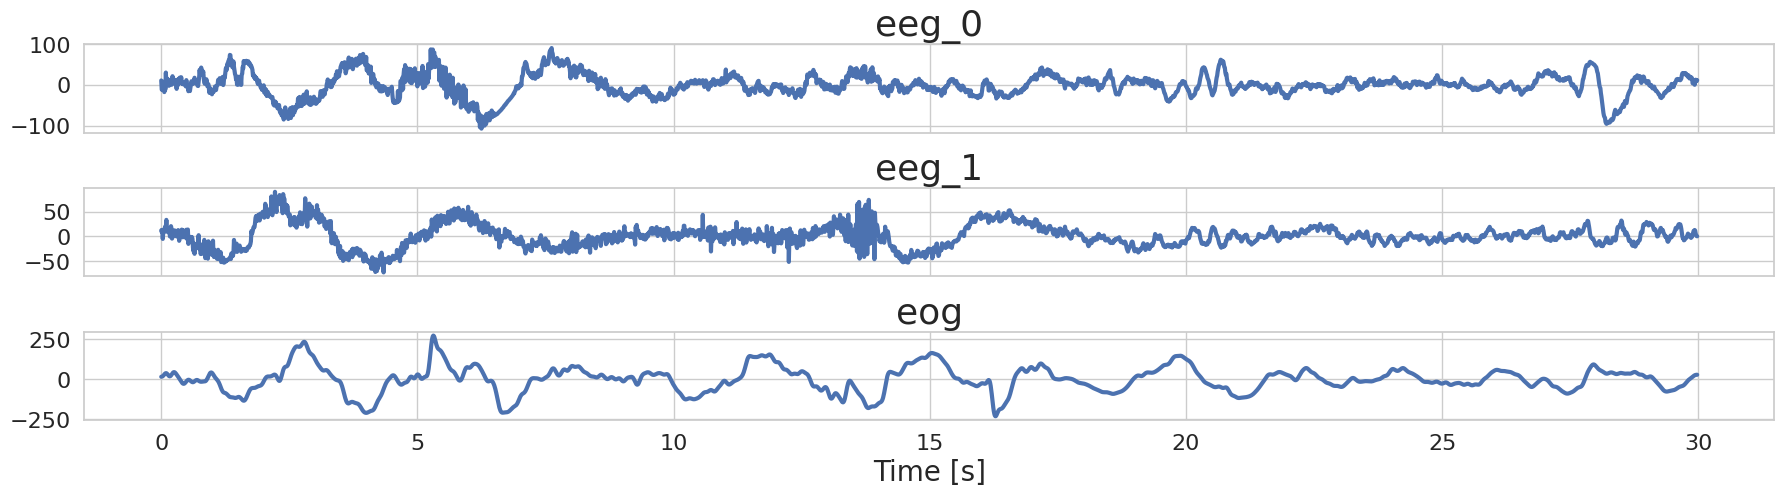

In [4]:
figs = {
    "sleep_edf_signals": measurement.plot(0, -1),
}

for name, fig in figs.items():
    fig.savefig(f"plots/{name}.pdf", bbox_inches="tight")

# **Statistics**

In [1]:
%load_ext autoreload
%autoreload 2

from msr.training.data.datamodules import SleepEDFDataModule

dm = SleepEDFDataModule("whole_signal_features")
dm.setup()

In [15]:
len(dm.train) + len(dm.val) + len(dm.test)

196350

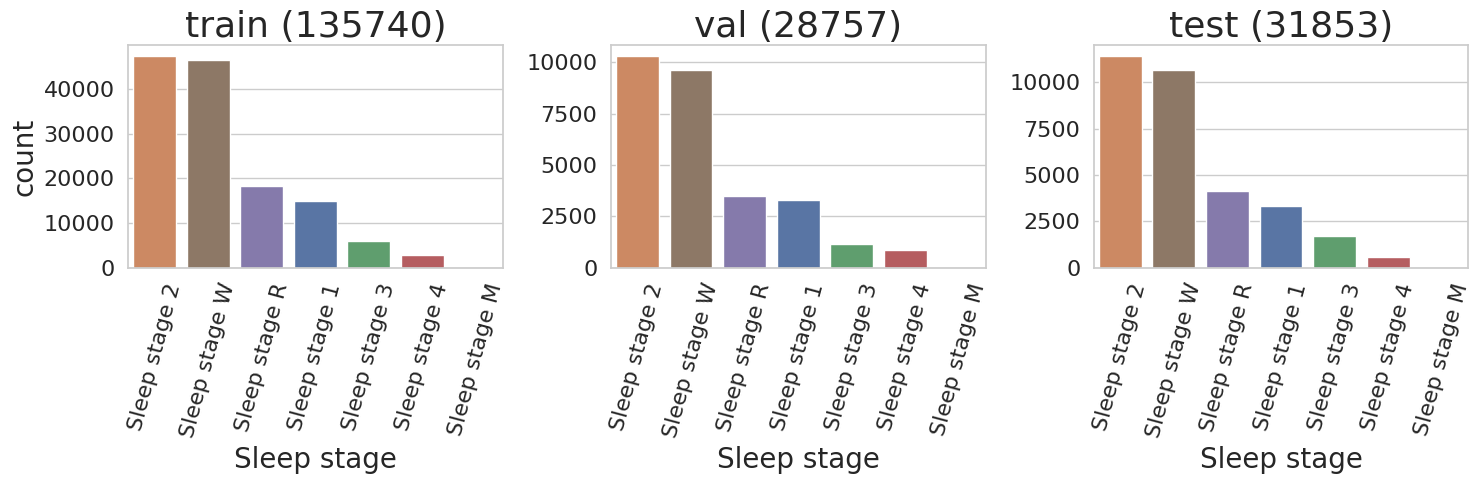

In [7]:
figs = {
    "sleep_edf_statistics": dm.plot_targets(),
}

In [8]:
for name, fig in figs.items():
    fig.savefig(f"plots/{name}.pdf", bbox_inches="tight")